### importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv('wine.csv')
data.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 14)

In [6]:
df = data.iloc[:,:3]
df

,Wine,Alcohol,Malic.acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Malic.acid'>

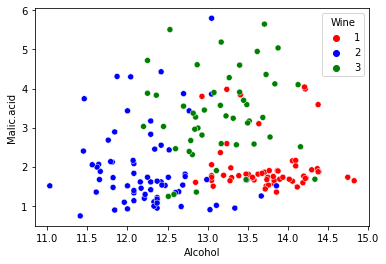

In [9]:
color_dict = {1:'red',2:'blue',3:'green'}
sns.scatterplot(df['Alcohol'],df['Malic.acid'],hue=df['Wine'],palette=color_dict)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Wine',axis=1),
                                                   df['Wine'],
                                                   test_size=0.3,
                                                   random_state=0)

In [12]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [14]:
X_train.head(5)

,Alcohol,Malic.acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51


In [15]:
X_test.head(5)

,Alcohol,Malic.acid
54,13.74,1.67
151,12.79,2.67
63,12.37,1.13
55,13.56,1.73
123,13.05,5.80


### MinMaxScaler

In [16]:
# creating object
scaler = MinMaxScaler()

# fitting the scaler to X_train,it will learn the parameters
scaler.fit(X_train)

# transform train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head(5)

,Alcohol,Malic.acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [18]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head(5)

,Alcohol,Malic.acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513


In [19]:
np.round(X_train.describe(),1)

,Alcohol,Malic.acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [20]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic.acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [ ]:
# we can see after scaling min=0 and max=1

### effect of scaling

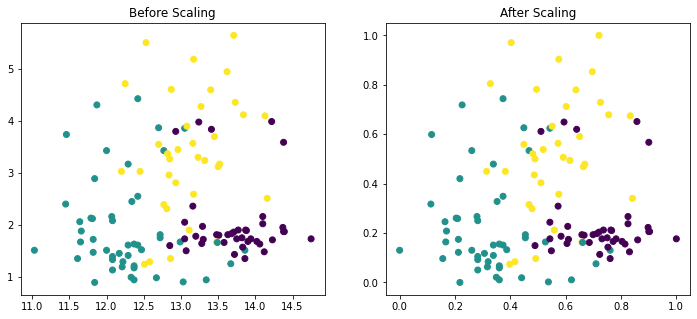

In [21]:
# on training data

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.scatter(X_train['Alcohol'],X_train['Malic.acid'],c=y_train)
ax1.set_title('Before Scaling')

# after scaling
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic.acid'],c=y_train)
ax2.set_title('After Scaling')

plt.show()

In [ ]:
# we can see scale is changed after scaling

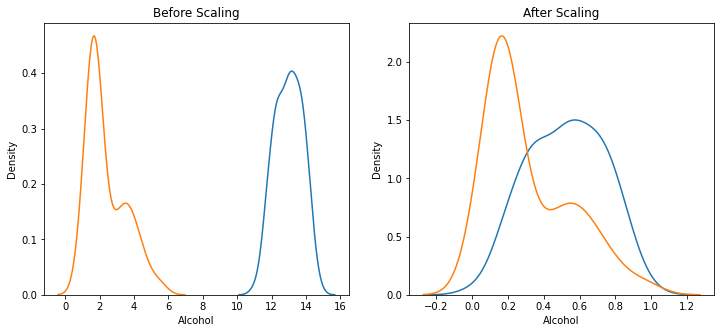

In [22]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic.acid'],ax=ax1)
ax1.set_title('Before Scaling')


# after scaling
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic.acid'],ax=ax2)
ax2.set_title('After Scaling')

plt.show()

### comparison of distribution

<AxesSubplot:title={'center':'Alcohol distribution after scaling'}, xlabel='Alcohol', ylabel='Density'>

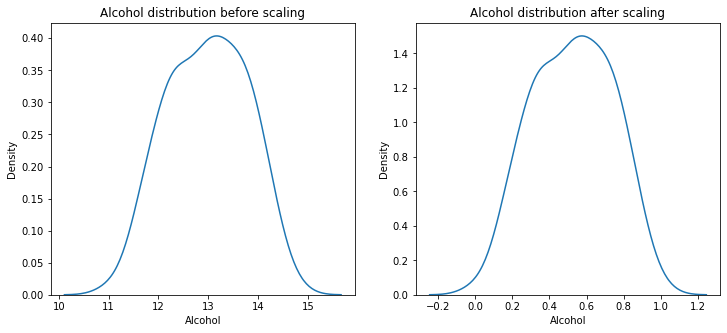

In [23]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Alcohol distribution before scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)


# after scaling
ax2.set_title('Alcohol distribution after scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)

In [ ]:
# distribution is same but scale is changed

<AxesSubplot:title={'center':'Malic acid distribution after scaling'}, xlabel='Malic.acid', ylabel='Density'>

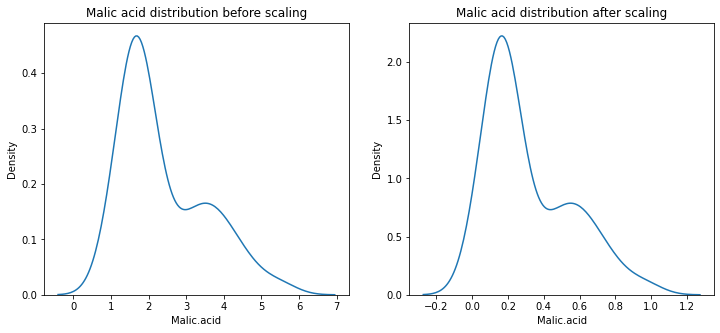

In [24]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Malic acid distribution before scaling')
sns.kdeplot(X_train['Malic.acid'],ax=ax1)


# after scaling
ax2.set_title('Malic acid distribution after scaling')
sns.kdeplot(X_train_scaled['Malic.acid'],ax=ax2)

In [ ]:
# distribution is same but scale is changed

### why scaling is important

In [26]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [28]:
lr.fit(X_train,y_train) # unscaled data

lr_scaled.fit(X_train_scaled,y_train) # scaled data

LogisticRegression()

In [29]:
y_pred = lr.predict(X_test)

y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [30]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.7592592592592593
Scaled 0.7962962962962963
